# Title:- Machine Learning Model for Occupancy Rates and Demand in the Hospitality Industry 

This Project takes different parameters and tries to accurately predict whether the hotel is going to occupied or free

## Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data into dataframes

In [2]:
dtrain=pd.read_csv('datatraining.txt', delimiter=',')
dvalid=pd.read_csv('datatest.txt', delimiter=',')
dtest=pd.read_csv('datatest2.txt', delimiter=',')

#### Converting the date column from object into datetime format

In [3]:
dtrain['date'] = pd.to_datetime(dtrain['date'])
dvalid['date'] = pd.to_datetime(dvalid['date'])
dtest['date'] = pd.to_datetime(dtest['date'])
dtrain.reset_index(drop=True, inplace=True)
dvalid.reset_index(drop=True, inplace=True)
dtest.reset_index(drop=True, inplace=True)

## Visualizing the data

<AxesSubplot:>

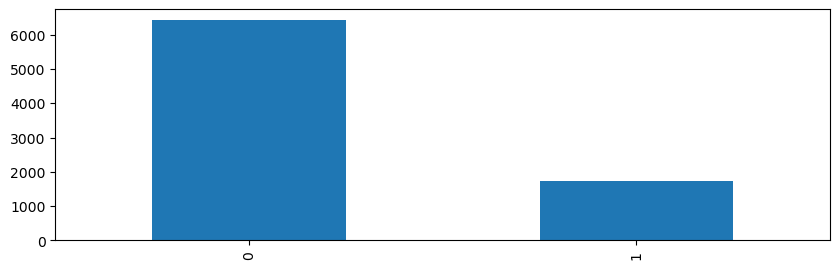

In [4]:
value_counts = dtrain['Occupancy'].value_counts()
plt.figure(figsize=(10,3))
value_counts.plot(kind='bar')

<AxesSubplot:>

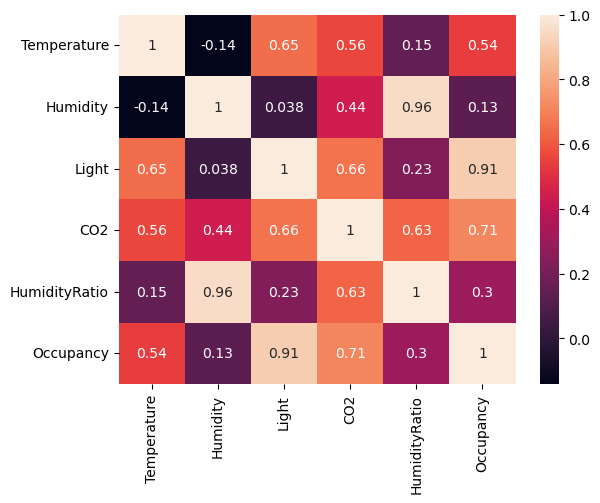

In [5]:
sns.heatmap(dtrain.corr(),annot=True)

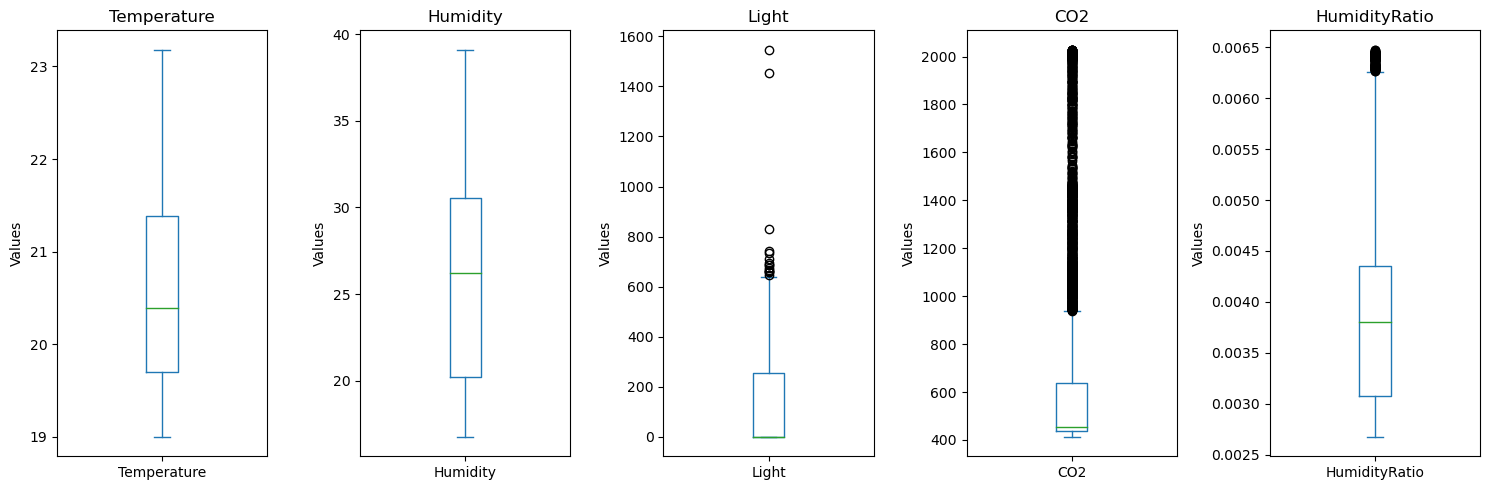

In [6]:
columns = dtrain.drop(columns=['date','Occupancy']).columns


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Iterate over the columns and plot box plots in each subplot
for i, column in enumerate(columns):
    ax = axes[i]  # Get the corresponding subplot
    dtrain[column].plot.box(ax=ax)
    ax.set_ylabel('Values')
    ax.set_title(f'{column}')

plt.tight_layout()  # Adjust spacing between subplots

plt.show()

#### Due to the small size of training data we won't be removing the outliers

In [7]:
dtrain.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


#### Extracting hour and day from the date column

In [8]:
dtrain['day'] = dtrain['date'].dt.day_name()
dvalid['day'] = dvalid['date'].dt.day_name()
dtest['day'] = dtest['date'].dt.day_name()
dtrain['hour'] = dtrain['date'].dt.hour
dvalid['hour'] = dvalid['date'].dt.hour
dtest['hour'] = dtest['date'].dt.hour

In [9]:
sample=dtrain.groupby('hour')['Occupancy'].sum().reset_index()
sample.head(100)

,hour,Occupancy
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,33
8,8,149
9,9,214


In [52]:
dtrain.head(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour
0,2015-02-04 17:51:00,23.180,27.272000,426.0,721.250000,0.004793,1,6,17
1,2015-02-04 17:51:59,23.150,27.267500,429.5,714.000000,0.004783,1,6,17
2,2015-02-04 17:53:00,23.150,27.245000,426.0,713.500000,0.004779,1,6,17
3,2015-02-04 17:54:00,23.150,27.200000,426.0,708.250000,0.004772,1,6,17
4,2015-02-04 17:55:00,23.100,27.200000,426.0,704.500000,0.004757,1,6,17
5,2015-02-04 17:55:59,23.100,27.200000,419.0,701.000000,0.004757,1,6,17
6,2015-02-04 17:57:00,23.100,27.200000,419.0,701.666667,0.004757,1,6,17
7,2015-02-04 17:57:59,23.100,27.200000,419.0,699.000000,0.004757,1,6,17
8,2015-02-04 17:58:59,23.100,27.200000,419.0,689.333333,0.004757,1,6,17
9,2015-02-04 18:00:00,23.075,27.175000,419.0,688.000000,0.004745,1,6,18


In [11]:
df=dtrain[dtrain['Occupancy']==0]

In [12]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour
16,2015-02-04 18:07:00,23.000,27.20,0.0,681.5,0.004728,0,Wednesday,18
17,2015-02-04 18:08:00,22.945,27.29,0.0,685.0,0.004728,0,Wednesday,18
18,2015-02-04 18:08:59,22.945,27.39,0.0,685.0,0.004745,0,Wednesday,18
19,2015-02-04 18:10:00,22.890,27.39,0.0,689.0,0.004730,0,Wednesday,18
20,2015-02-04 18:10:59,22.890,27.39,0.0,689.5,0.004730,0,Wednesday,18


## Label Encoding the Day name column

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
dtrain['day']=le.fit_transform(dtrain['day'])
dvalid['day']=le.fit_transform(dvalid['day'])
dtest['day']=le.fit_transform(dtest['day'])

In [16]:
dtrain.day.value_counts()

4    1440
0    1440
2    1440
3    1440
1    1440
5     574
6     369
Name: day, dtype: int64

## Splitting data into dependent and independent variables

In [17]:
x_train=dtrain.drop(columns=['Occupancy','date'],axis=1)
x_valid=dvalid.drop(columns=['Occupancy','date'],axis=1)
x_test=dtest.drop(columns=['Occupancy','date'],axis=1)
x_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,day,hour
0,23.18,27.2720,426.0,721.25,0.004793,6,17
1,23.15,27.2675,429.5,714.00,0.004783,6,17
2,23.15,27.2450,426.0,713.50,0.004779,6,17
3,23.15,27.2000,426.0,708.25,0.004772,6,17
4,23.10,27.2000,426.0,704.50,0.004757,6,17


In [18]:
y_train=dtrain['Occupancy']
y_valid=dvalid['Occupancy']
y_test=dtest['Occupancy']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: Occupancy, dtype: int64

## Scaling the independent data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale=MinMaxScaler()

In [21]:
column_names1 = x_train.columns
scaled_x_train=pd.DataFrame(scale.fit_transform(x_train),columns=column_names1)

column_names2 = x_valid.columns
scaled_x_valid=pd.DataFrame(scale.fit_transform(x_valid),columns=column_names2)

column_names3 = x_test.columns
scaled_x_test=pd.DataFrame(scale.fit_transform(x_test),columns=column_names3)

In [22]:
scaled_x_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,day,hour
0,1.000000,0.470533,0.275490,0.190933,0.557318,1.0,0.73913
1,0.992823,0.470332,0.277754,0.186446,0.554807,1.0,0.73913
2,0.992823,0.469326,0.275490,0.186136,0.553761,1.0,0.73913
3,0.992823,0.467315,0.275490,0.182887,0.551669,1.0,0.73913
4,0.980861,0.467315,0.275490,0.180566,0.547851,1.0,0.73913


## Handling the imbalanced data using SMOTE

In [23]:
#pip install imbalanced-learn

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote=SMOTE()

In [26]:
x_resampled, y_resampled = smote.fit_resample(scaled_x_train, y_train)

In [27]:
y_resampled.value_counts()

1    6414
0    6414
Name: Occupancy, dtype: int64

## Model Training-- RF

In [28]:
from sklearn.ensemble import RandomForestClassifier

## Model Training-- SVM

In [29]:
from sklearn.svm import SVC

## Hyperparameter tunning

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
parameters_sv={
    'kernel':['linear','rbf','sigmoid'],
    'C':[0.1,0.5,1.0],
    'gamma':[0.01,0.0001]
}

parameters_rf={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':['auto', 'sqrt', 'log2']
}



In [32]:
#RCV_sv=RandomizedSearchCV(estimator=SVC(),param_distributions=parameters_sv,cv=10,n_iter=5)
#RCV_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameters_rf,cv=10,n_iter=5)

In [33]:
#RCV_sv.fit(x_resampled, y_resampled)

In [34]:
#RCV_rf.fit(x_resampled, y_resampled)

In [35]:
#RCV_sv.best_score_

In [36]:
#RCV_rf.best_score_

## Based on this Random Forest is selected

In [37]:
#RCV_rf.best_params_

## Final Model Building using the best parameters

In [38]:
model=RandomForestClassifier(n_estimators=10, max_features='sqrt', criterion='gini')

In [39]:
model.fit(x_resampled, y_resampled)

RandomForestClassifier(max_features='sqrt', n_estimators=10)

## Evaluating using validation set

In [40]:
y_pred_valid=model.predict(scaled_x_valid)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_valid,y_pred_valid)

0.9579737335834897

## Evaluating using Testing set

In [43]:
y_pred_test=model.predict(scaled_x_test)

In [44]:
accuracy_score(y_test,y_pred_test)

0.9855414273995078

In [50]:
unique_values, value_counts = np.unique(y_pred_test, return_counts=True)

# Combine unique values and their counts
result = np.column_stack((unique_values, value_counts))

print(result)

[[   0 7664]
 [   1 2088]]


In [51]:
unique_values, value_counts = np.unique(y_test, return_counts=True)

# Combine unique values and their counts
result = np.column_stack((unique_values, value_counts))

print(result)

[[   0 7703]
 [   1 2049]]


## Importing and converting our model into pickle format

In [2]:
import pickle

In [3]:
pickle.dump(model,open("model.pkl","wb"))

NameError: name 'model' is not defined